  Unnamed: 0     Unnamed: 1 Unnamed: 2 Unnamed: 3      Unnamed: 4 Totals  \
0         Rk         Player      Class        Pos          School      G   
1          1   Amaree Abram         SO          G    Georgia Tech     10   
2          2   Sola Adebisi         FR          F   Florida State      7   
3          3  Prince Aligbe         SO          F  Boston College     35   
4          4     Abe Atiyeh         SR          G  Boston College      4   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 11 Unnamed: 12  \
0         MP        TRB        AST        STL  ...         TOV          PF   
1        108         17         11          1  ...           9          10   
2          9          1          1          0  ...           1           1   
3        651        119         21         15  ...          30          51   
4          6          0          0          0  ...           1           0   

  Unnamed: 13 Shooting Unnamed: 15 Unnamed: 16 Unnamed: 17 Advanced  \
0  

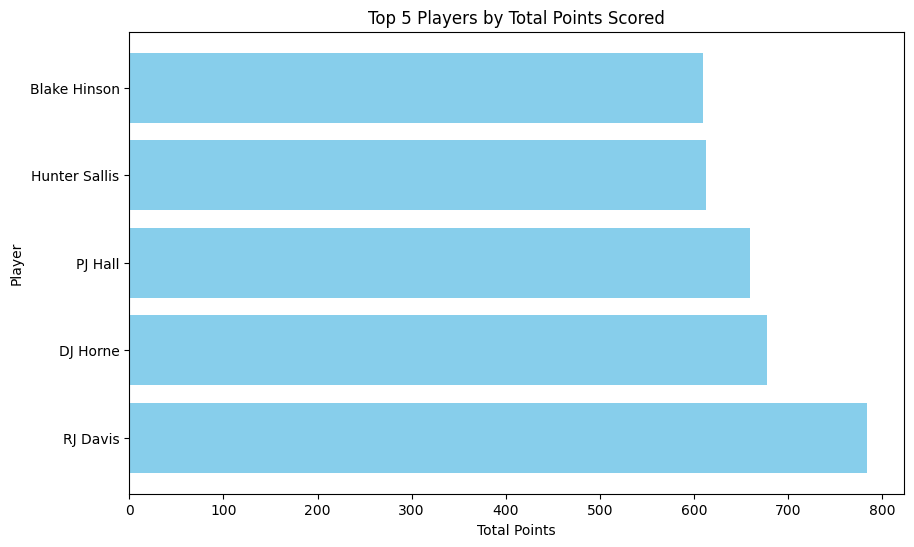

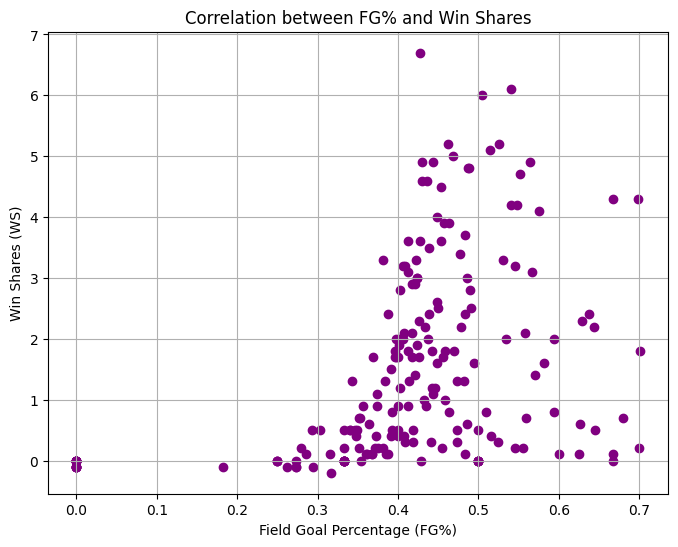

Correlation coefficient between FG% and WS: 0.42106638941997876


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('acc_players-2324F.csv')

print(df.head(5))

columns = ['Rk', 'Player', 'Class', 'Pos', 'School', 'G', 'MP', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'PER', 'WS', 'BPM']

df.columns = columns

df = df.dropna(subset=['Player'])

df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')
df['MP'] = pd.to_numeric(df['MP'], errors='coerce')
df['TRB'] = pd.to_numeric(df['TRB'], errors='coerce')

print(df.head())

total_points = df['PTS'].sum()
print(f"Total points scored by all players: {total_points}")

most_minutes_player = df.loc[df['MP'].idxmax()]['Player']
print(f"Player who played the most minutes: {most_minutes_player}")

top_5_rebounders = df[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(5)
print("Top 5 players by total rebounds:\n", top_5_rebounders)

df_filtered = df[df['MP'] > 500]

top_assists_player = df_filtered.loc[df_filtered['AST'].idxmax()]['Player']
print(f"Player with the highest total assists: {top_assists_player}")

top_3_assists = df_filtered[['Player', 'AST']].sort_values(by='AST', ascending=False).head(3)
print("Top 3 Assist Leads in the League:\n", top_3_assists)

top_3_shot_blockers = df_filtered[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)
print("Top 3 Shot Blockers in the League:\n", top_3_shot_blockers)

school_points = df.groupby('School')['PTS'].sum().reset_index().sort_values(by='PTS', ascending=False)

school_assists = df.groupby('School')['AST'].sum().reset_index().sort_values(by='AST', ascending=False)

top_3_schools_by_points = school_points.head(3)
print("Top 3 schools by total points scored:\n", top_3_schools_by_points)


top_5_players_by_points = df[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_players_by_points['Player'], top_5_players_by_points['PTS'], color='skyblue')
plt.xlabel('Total Points')
plt.ylabel('Player')
plt.title('Top 5 Players by Total Points Scored')
plt.show()


df['FG%'] = pd.to_numeric(df['FG%'], errors='coerce')
df['WS'] = pd.to_numeric(df['WS'], errors='coerce')

plt.figure(figsize=(8, 6))
plt.scatter(df['FG%'], df['WS'], color='purple')
plt.title('Correlation between FG% and Win Shares')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.grid(True)
plt.show()

correlation_coefficient = df['FG%'].corr(df['WS'])
print(f"Correlation coefficient between FG% and WS: {correlation_coefficient}")